# The first 3 cells below are to scrape the items from the dataTau page. The strategy that seemed to work best is to use the itemID appended to the url for each link in DataTau. So I manually had to get the current latest itemID and then count down from there and scrape the required information for each item. 

In [13]:
import json
import requests
import urllib3
from urllib2 import urlopen
import csv
from math import *
from BeautifulSoup import BeautifulSoup
import urlparse
import re
import datetime
import pandas as pd
import traceback
import time

In [14]:
maxItem = 10000
count = maxItem
numOfStories = 0
numOfComments = 0

In [15]:
with open('DataTau.csv','wb') as fStories:
    writerStories = csv.writer(fStories,delimiter=',')
    headerList = ['title','link','points','user','domain','time of post','time of data collection','id']
    writerStories.writerow(headerList)
    
    while (count > 1):
        item = str(count)
        http = urllib3.PoolManager()
        queryString = 'http://www.datatau.com/item?id='+item
        html = http.urlopen('GET',queryString,preload_content=False).read()
        try:
            
            soup = BeautifulSoup(html)
            table = soup.find("table", {'border':'0', 'cellpadding':'0'})
            page_data = []
            for td in table.findAll('td', 'title'):
                try:    
                    st = td.findNext('td', 'subtext')   
                    page_data.append(td.find('a').string) 
                    page_data.append(td.find('a')['href'])
                    page_data.append(st.find('span').string)
                    page_data.append(st.find('a').string)
                    page_data.append(urlparse.urlparse(td.find('a')['href']).netloc)
                    page_data.append(re.sub('[^a-zA-Z0-9-_*.]', '', st.contents[3]))
                    page_data.append(str(datetime.datetime.utcnow()))
                    page_data.append(item)
                    writerStories.writerow(page_data)
                except:
                    pass
        except:
            page_data = []
            #print 'In ExceptBlock' +item
            print page_data
            pass
            
            
        if (count%25 == 0):
            time.sleep(10)
        count = count -1
        if (count%1000 == 0):
            print count
        

5000
4000
3000
2000
1000


In [16]:
DataTau_pd = pd.read_csv('DataTau4.csv')

# Here is a snapshot of the scraped data. The time aspect of the post seems to be tricky. The only information readily available is elapsed time as a string, so I decided to add a time of collection of data column, so as to work back the time of the post. But I haven't come up with that yet.

In [17]:
DataTau_pd.head()

,title,link,points,user,domain,time of post,time of data collection,id
0,"Recurrent Neural Network Tutorial, Part 4 â&eu...",http://www.wildml.com/2015/10/recurrent-neural...,1 point,dbritz,www.wildml.com,42daysago,19:32.2,10000
1,Speeding Up Spark With Native Binaries,http://deeplearning4j.org/spark-fast-native-bi...,1 point,vonnik,deeplearning4j.org,43daysago,19:37.6,9998
2,Amazon Mechanical Turk: help for building your...,http://cloudacademy.com/blog/machine-learning-...,4 points,alexcasalboni,cloudacademy.com,43daysago,19:39.1,9991
3,Academia to Industry: Data Science Myths and T...,http://www.insightdatascience.com/blog/academi...,10 points,abc-jap,www.insightdatascience.com,43daysago,19:39.3,9990
4,Hiring for Data Scientists,http://www.slideshare.net/dominodatalab/data-s...,8 points,AnnaAnisin,www.slideshare.net,43daysago,19:39.5,9989


# 5189 well formed links were scraped. And 4945 had proper domain names attached. I believe the ones without the domain name are the Ask DT queries with no link per se. 

In [97]:
DataTau_pd.count()

title                      5189
link                       5189
points                     5189
user                       5189
domain                     4945
time of post               5189
time of data collection    5189
id                         5189
dtype: int64

# Below I have a couple examples of some basic html cleaning I attempted of the posted article's contents itself. The first example turned out decent, while the second which is a page with ads and other information, has too much noise

In [98]:
#Basic cleaning example of html text.This is a fairly readable output
Linkhtml = http.urlopen('GET',DataTau_pd['link'][1],preload_content=False).read()    
LinkSoup = BeautifulSoup(Linkhtml)
Linktext = LinkSoup.getText()
Linktext #actual link: 'http://deeplearning4j.org/spark-fast-native-binaries'

u'DOCTYPE htmlEnable responsiveness on mobile devicesDeeplearning4j - Open-source, distributed deep learning for the JVMCSSIconsRSSGoogle Analytics(function(i,s,o,g,r,a,m){i[\'GoogleAnalyticsObject\']=r;i[r]=i[r]||function(){\n  (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),\n  m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)\n  })(window,document,\'script\',\'//www.google-analytics.com/analytics.js\',\'ga\');\n\n  ga(\'create\', \'UA-48811288-1\', \'auto\');\n  ga(\'require\', \'linkid\', \'linkid.js\');\n  ga(\'send\', \'pageview\');\n  ga(\'require\', \'displayfeatures\');this is the fork me on github ribbon on the upper rightDL4JDeep Learning for JavaHomeQuickstartSparkDocumentationWord2VecJavadocAboutHow to Speed Up Spark With Native Binaries and OpenBlasSpark is a distributed form of MapReduce. It ranked as the Apache Foundation\u2019s most popular open-source project last year. It\u2019s supposed to be fast, but beca

u'DOCTYPE htmlAmazon Mechanical Turk: build Machine Learning datasetswindow._wpemojiSettings = {"baseUrl":"http:\\/\\/s.w.org\\/images\\/core\\/emoji\\/72x72\\/","ext":".png","source":{"concatemoji":"http:\\/\\/cloudacademy.com\\/blog\\/wp-includes\\/js\\/wp-emoji-release.min.js?ver=4.3.1"}};\n\t\t\t!function(a,b,c){function d(a){var c=b.createElement("canvas"),d=c.getContext&&c.getContext("2d");return d&&d.fillText?(d.textBaseline="top",d.font="600 32px Arial","flag"===a?(d.fillText(String.fromCharCode(55356,56812,55356,56807),0,0),c.toDataURL().length>3e3):(d.fillText(String.fromCharCode(55357,56835),0,0),0!==d.getImageData(16,16,1,1).data[0])):!1}function e(a){var c=b.createElement("script");c.src=a,c.type="text/javascript",b.getElementsByTagName("head")[0].appendChild(c)}var f,g;c.supports={simple:d("simple"),flag:d("flag")},c.DOMReady=!1,c.readyCallback=function(){c.DOMReady=!0},c.supports.simple&&c.supports.flag||(g=function(){c.readyCallback()},b.addEventListener?(b.addEventList
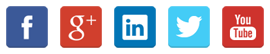

In [101]:
#Basic cleaning example of html text.This example has too much noise in the output
Linkhtml = http.urlopen('GET',DataTau_pd['link'][2],preload_content=False).read()    
LinkSoup = BeautifulSoup(Linkhtml)
Linktext = LinkSoup.getText()
Linktext #actualtext 'http://cloudacademy.com/blog/machine-learning-datasets-mechanical-turk/'

# Here using the domain names extracted, a snapshot of the most popular domains is shown. Like GitHub links are the most popular type of links on DataTau

In [89]:
DomainPopularity = DataTau_pd.groupby(['domain']).size()
DomainPopularity_df.columns = ['count']
DomainPopularity_df.sort('count',ascending = False)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,count
domain,
github.com,222
www.youtube.com,153
medium.com,95
arxiv.org,74
nbviewer.ipython.org,69
machinelearningmastery.com,55
radar.oreilly.com,53
datascienceplus.com,47
blog.yhathq.com,43
